## Wave equation
Modify the wave equation so that the initial conditions represent a "motionless string" and the boundary condition at the left of the domain generates a signal that propagates from left to right.

stability: 0.009999999999999998


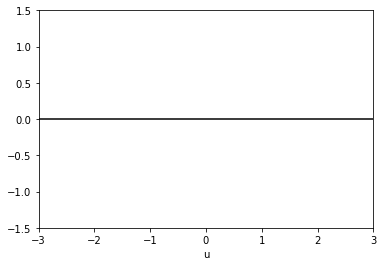

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import animation, rc


# define the discretization grid
dx = 0.1  # space increment (default 0.1)
dt = 0.01 # time increment  (default 0.01)

tmin =   0.0  # initial time
tmax = 100.0  # final time
xmin =  -3.0  # left bound
xmax =   3.0  # right bound

nx = int((xmax-xmin)/dx) + 1 # number of points on x grid
nt = int((tmax-tmin)/dt) + 2 # number of points on t grid

u = np.zeros((nt,nx)) # solution array

#set initial pulse shape
def init_wave(x):
    val = np.exp(-(x**2)/0.25)
    if abs(val)<.001:
        val = 0.0

    return val

def init_square(x):
    val = 0.0
    if abs(x)<0.5:
        val = 1.0

    return val

def init_random(x):
    return np.random.rand(1)

def step_wave(t):

    c = 1.0 # wave speed

    if t<2:

        print( 'stability:', (c*dt/dx)**2 )

        # set initial condition
        for i in range(0,nx):
            u[t,i] = 0
            #u[t,i] = init_wave( xmin + i*dx )

    else:
        # compute second x-derivative using central differences
        ddx = (u[t-1,0:nx-2]-2*u[t-1,1:nx-1]+u[t-1,2:nx])/(dx**2)

        # apply second-order central differences in time
        u[t,1:nx-1] = 2*u[t-1,1:nx-1] - u[t-2,1:nx-1] + (c*dt)**2 * ddx

        # apply boundary conditions
        u[t,0]    = np.sin(t*dt*2*math.pi)
        u[t,nx-1] = 0

    l.set_data(np.linspace(xmin,xmax,nx), u[t,:])
    return l,

def step_heat(t):

    k = 0.4 # diffusion constant

    if t<1:

        print( 'stability:', k*dt/(dx**2) ) # (c*dt&dx)**2
        for i in range(0,nx):
            u[t,i] = init_wave( xmin + i*dx )

    else:

        # compute second x-derivative using central differences
        ddx = (u[t-1,0:nx-2]-2*u[t-1,1:nx-1]+u[t-1,2:nx])/(dx**2)

        # apply forward differences in time
        u[t,1:nx-1] = u[t-1,1:nx-1] + k * dt * ddx

        # apply boundary conditions
        u[t,0]    = 0.0
        u[t,nx-1] = 0.0

    l.set_data(np.linspace(xmin,xmax,nx), u[t,:])
    return l,

fig1 = plt.figure()
l, = plt.plot([], [], 'k-')
plt.xlim(xmin, xmax)
plt.ylim(-1.5, 1.5)
plt.xlabel('u')

line_ani = animation.FuncAnimation(fig1, step_wave, nt-1, interval=5, repeat=False, blit=True)
plt.show()


## Results

Here you can appreciate 

<img src="./waveeqresults/1.png">
<img src="./waveeqresults/2.png">
<img src="./waveeqresults/3.png">
<img src="./waveeqresults/4.png">
<img src="./waveeqresults/5.png">
<img src="./waveeqresults/6.png">
<img src="./waveeqresults/7.png">
<img src="./waveeqresults/8.png">